In [1]:
!apt-get -y install fonts-ipafont-gothic > /dev/null 2>&1

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
ipa_font = fm.FontProperties(fname="/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [5]:
X = df[['rm', 'lstat']]  # rm=部屋数, lstat=低所得者率
y = df[['medv']]         # medv=住宅価格

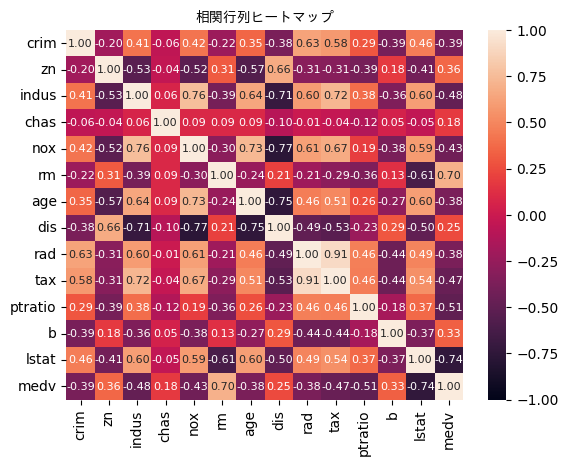

In [6]:
# 相関行列の可視化
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', annot_kws={"fontsize":8})
plt.title("相関行列ヒートマップ", fontproperties=ipa_font)
plt.show()

In [7]:
# crim    : 人口1人当たりの犯罪発生数
# zn      : 25,000 平方フィート以上の住居区画の占める割合
# indus   : 小売業以外の商業が占める面積の割合
# chas    : チャールズ川によるダミー変数 (1:川の周辺, 0:それ以外))
# nox     : NOx の濃度
# rm      : 住居の平均部屋数
# age     : 1940 年より前に建てられた物件の割合
# dis     : 5つのボストン市の雇用施設からの距離 (重み付け済)
# rad     : 環状高速道路へのアクセスしやすさ
# tax     : $10,000 ドルあたりの不動産税率の総計
# ptratio : 町毎の児童と教師の比率
# b       : 町毎の黒人(Bk)の比率を次の式で表したもの。1000(Bk–0.63)^2
# lstat   : 給与の低い職業に従事する人口の割合 (%)
# medv    : 「住宅価格」(1000ドル単位)の中央値

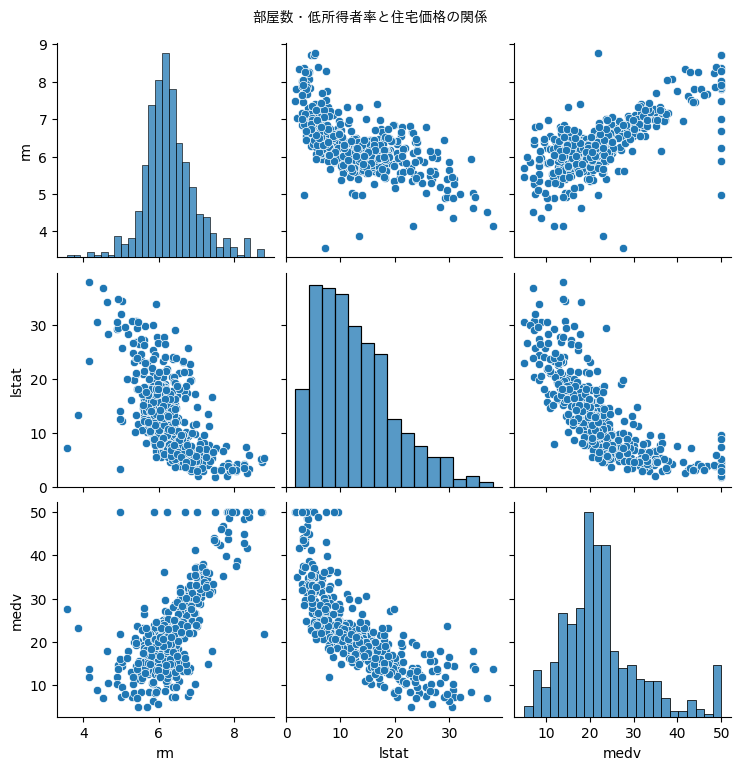

In [8]:
# データのペアプロット表示
sns.pairplot(df[['rm', 'lstat', 'medv']])
plt.suptitle("部屋数・低所得者率と住宅価格の関係", y=1.02, fontproperties=ipa_font)
plt.show()

In [9]:
# ・部屋数(RM)が多い程、住宅価格は上がる (正の相関)
# ・給与が低い人たちの割合(LSTAT)が高い程、住宅価格は下がる (負の相関)

In [10]:
# 学習データとテストデータに分割
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

# モデルの作成・学習（Gradient Boosting）
model = GradientBoostingRegressor()
model.fit(train_x, train_y.values.ravel())  # ※ yを1次元に変換

GradientBoostingRegressor()

In [11]:
# 予測
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)

# 精度評価
print('train')
print('————————————')
print('  R2：{:.3f}'.format(r2_score(train_y, pred_train_y)))
print('RMSE：{:.3f}'.format(np.sqrt(mean_squared_error(train_y, pred_train_y))))
print()
print('test')
print('————————————')
print('  R2：{:.3f}'.format(r2_score(test_y, pred_test_y)))
print('RMSE：{:.3f}'.format(np.sqrt(mean_squared_error(test_y, pred_test_y))))

train
————————————
  R2：0.925
RMSE：2.474

test
————————————
  R2：0.754
RMSE：4.752


In [12]:
# R2 (決定係数)
  # ・推定された回帰式の当てはまりの良さ
  # ・1に近いほど予測精度が高い

# RMSE (二乗平均平方根誤差)
  # ・平均化された誤差の値
  # ・0に近いほど予測精度が高い